<h1 style="font-size:30px;">Binary Classification using PyTorch</h1>

In this notebook, we will introduce the topic of **Binary classification**. In machine learning, classification refers to the predictive modeling problem of identifying which of a set of categories an observation belongs to. The categories are referred to as classes. In the figure below, we are showing a hypothetical dataset that represents two classes. We have color coded the classes as red and blue, but this is only for visualization purposes. The classes themselves are characterized by two features ($x1$ and $x2$). Our task is to define a model that will predict the correct class based on the value of two input features. This is the definition of binary classification. The model that we develop will lead to a linear decision boundary, as shown in the figure. Later on, in this module we will cover the topic of multinomial classification, which involves three or more classes.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_binary_classification_data.jpg' width=1000 align='center'>

## Table of Contents
* [1 Binary Classification](#1-Binary-Classification)
* [2 Mathematical Foundation](#2-Mathematical-Foundation)
* [3 Model Architecture](#3-Model-Architecture)
* [4 Data Generation](#4-Data-Generation)
* [5 Data Preparation](#5-Data-Preparation)
* [6 Perform Training](#6-Perform-Training)
* [7 Model Evaluation](#7-Model-Evaluation)
* [8 Conclusion](#8-Conclusion)

## 1 Binary Classification

Before we begin, let's set the stage with a simple binary classification problem to introduce the objective and the terminology. Suppose, we have some data that contains two features that are known to be good discriminators for whether a tumor is either benign or malignant. In this example, we have two classes (benign and malignant), and we have two features (say, $𝑥_1$ and $x_2$). For this discussion, it's not important what these features represent at this point, but let's assume they are real-valued quantities that can be measured. The two classes, by definition, are categorical, and we assign each class a numerical label such "benign" = 0 and "malignant" = 1.

Our task is to define a model that will predict the correct class based on the value of two input features. So, rather than predicting a real-valued number as we did with regression, our goal is to predict the correct class according to its class label. Note that we can use any number of features available. The reason this is called binary classification is that we only have two classes.

In the next section, we will develop the mathematical foundation for binary classification, which is known as Logistic Regression, and in the subsequent sections, we will demonstrate how to use Keras to model binary classification using a single perception with a sigmoid activation function. Much of the material covered in this notebook has been introduced in the two previous notebooks on regression, but there are a few key differences that allow us to transform the problem from regression (predicting a real-valued number) to the problem of classification (predicting a class label).

## 2 Mathematical Foundation

In Module 1, we introduced the mathematical model for **linear regression** in which we developed a linear model for the predicted output based on the weighted sum of the input features. The output in this case, is a real-valued number. To recap, we developed the following model:

$$ h_\theta(x) = y' = \theta_0 + \theta_1x_1 + \theta_2x_2 + ...$$


As before, the general notation can be simplified to the following by letting $x_0 = 1$ which means that $\theta_0$ becomes the bias term, and therefore the above expression can be simplified as follows:

$$ h(x) = y' = \sum_{i=0}^{n} \theta_ix_i = \theta^Tx $$

Where $y'$ is a real-valued predicted target variable in a regression problem. Let's now see how this can be extended to model a classification problem.

### 2.1 Classification and the Logistic Function

In a **classification** problem, the predicted output is a categorical label that specifies which class the input sample belongs to. But how do we accomplish this? This is where the **logistic function** comes to the rescue as defined below:

$$ y' = \sigma(z) = \frac{1}{1 + e^{-z}} $$


This function is also commonly referred to as a **sigmoid** function because the shape resembles an 's' as shown below. Here, $z = \theta^Tx$, and the output of this function is our new prediction $y'$ for classification.  Notice that $\sigma(z)$ tends towards 1 as $z \to +\infty$, and $\sigma(z)$ tends towards 0 as $z \to -\infty$. And further, the function is bounded between 0 and 1.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_sigmoid_function.png' width=350 align='center'><br/>

Using this function, we can now transform our weighted inputs to produce a real-valued number bounded between 0 and 1 (where 0 represents one class and 1 represents the other class). In a binary classifcation problem, these two classes are sometimes referred to as the negative and positive classes, respectively.

### 2.2 Probabilistic Interpretation
Since this function is bounded between 0 and 1, we can now think of the output from this function as the probability that an input sample belongs to class 1(or the positive class).

$$P(y\ =\ 1| x;\theta) = y'$$

And therefore, the probability that the input sample belongs class 0 (or the negative class) is:

$$P(y\ =\ 0| x;\theta) = 1 - y'$$

These two expressions can be conveniently combined into a single equation as shown below, where $y$ represents the ground truth (or label) for the class.

$$p(y\ |\ x;\theta) = (y')\ ^y\ (1 - y')^{1-y}$$

The above expression is read as: The probability of $y$ given $x$, parameterized by $\theta$. For example, an input of $z = 0$, would correspond to $y'=0.5$ indicating that the input sample is equally likely to be from either class. Furthermore, an input value of $z = 2.5$, would correspond to a greater than 90% probability of the input sample belonging to class 1. So we can now see that since this function is monotonically increasing, we can use a single threshold to determine if the input sample corresponds to class 0 or to class 1.

### 2.3 Binary Cross Entropy Loss

The question now becomes, how do we solve for the parameters of the model ($\theta$)? This can be accomplished using the technique of maximum likelihood estimation (MLE) which is beyond the scope of this discussion, but we will brielfy provide the intuition for how this is done be developing an appropriate loss functon for binary classification. Let's start with the idea that we would like to learn the weights that maximize the probabilty of the correct label given by:

$$P(y\ |\ x;\theta) = (y')^y\ (1 - y')^{1-y}$$

If we take the log of both sides of the above equation, we get a very convenient mathematical expression that will not affect the optimization (maximizing the probability will also maximize the log of the probability).

$$log\ [p(y\ |\ x;\theta)\ ] = y\ log(y') + (1-y)\ log(1 - y')$$

In order to turn this into a loss function that we can minimize, we can take the negative log of the above probability that leads us to the **Binary Cross Entropy Loss Function** shown below:

$$J(y') = - y\ log(y')\ -\  (1-y)\ log(1 - y')$$

And recall that with $z = \theta^Tx$, the predicted value for a given input sample is:

$$ y' = \sigma(z) = \frac{1}{1 + e^{-z}} $$

And therefore, if

- $\sigma(z) > 0.5$ then input belongs to the positive class or class `1`
- $\sigma(z) < 0.5$ then input belongs to the negative class or class `0`

A few numerical examples are shown below that indicate the loss based on the true class $y$ and the predicted value $y'$. Notice that when the activation function output ($y'$) is close to the true label the loss is very small.

| y  | y'  |  Loss |Pred. Class|       Notes|
|:-: |-----|-------|:-:|:-: |
| 1  | .90 | 0.046  | 1 |y' > 0.5, assigned to class 1|
| 1  | .10 | 1.000  | 0 |y' < 0.5, assigned to class 0|
| 0  | .01 | 0.004  | 0 | y' < 0.5, assigned to class 0|
| 0  | .99 | 1.301  | 1 | y' > 0.5, assigned to class 1|

**Note**: This binary classification model is often referred to as **Logistic Regression** because it is based on the *Logistic* function, but this has no relation to the regression problems we previously discussed. It is purely categorical and refers to classification, not regression. The terminology is unfortunate, but it is long-standing.

As we will see further below, we can specify Binary Cross Entropy as the loss function in Keras, and select an optimizer to train a binary classification model.

## 3 Model Architecture
The model architecture below for binary classification is similar to regression, but let's highlight the differences. First, notice that we use a sigmoid activation function and that the predicted output is a label rather than a real valued number. The label indcates which class is predicted. In this example, we are assuming binary classification, so we have two labels (say, 0 and 1). Note that binary classification can use any number of input features. In this notebook, we will use two input features, but this has nothing to do with the fact that we are performing binary classification. As we will see later in the course, binary classification can be performed using literally thousands of input features.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_binary_classification_wx_b.png' width=700 align='center'><br/>

In [1]:
import os
import random
import math
import time
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as dist
import torch.optim as optim


import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt  # one of the best graphics library for python
import matplotlib.animation as animation

plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

block_plot = False

In [2]:
bold = f"\033[1m"
reset = f"\033[0m"

Set random number seeds to maintain reproducability.

In [3]:
def system_config(SEED_VALUE=42, package_list=None):
    """
    Configures the system environment for PyTorch-based operations.

    Args:
        SEED_VALUE (int): Seed value for random number generation. Default is 42.
        package_list (str): String containing a list of additional packages to install
        for Google Colab or Kaggle. Default is None.

    Returns:
        tuple: A tuple containing the device name as a string and a boolean indicating GPU availability.
    """

    random.seed(SEED_VALUE)
    np.random.seed(SEED_VALUE)
    torch.manual_seed(SEED_VALUE)

    def is_running_in_colab():
        return 'COLAB_GPU' in os.environ

    def is_running_in_kaggle():
        return 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

    #--------------------------------
    # Check for the availability GPUs.
    #--------------------------------
    if torch.cuda.is_available():
        print('Using CUDA GPU')

        # This section for installing packages required by Colab.
        if is_running_in_colab() or is_running_in_kaggle():
            print('Installing required packages...')
            !pip install {package_list}

        # Set the device to the first CUDA device.
        DEVICE = torch.device('cuda')
        print("Device: ", DEVICE)
        GPU_AVAILABLE = True

        torch.cuda.manual_seed(SEED_VALUE)
        torch.cuda.manual_seed_all(SEED_VALUE)

        # Performance and deterministic behavior.
        torch.backends.cudnn.enabled = True       # Provides highly optimized primitives for DL operations.
        torch.backends.cudnn.deterministic = True # Insures deterministic even when above cudnn is enabled.
        torch.backends.cudnn.benchmark = False    # Setting to True can cause non-deterministic behavior.

    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        print('Using Apple Silicon GPU')

        # Set the device to the Apple Silicon GPU Metal Performance Shader (MPS).
        DEVICE = torch.device("mps")
        print("Device: ", DEVICE)
        # Environment variable that allows PyTorch to fall back to CPU execution
        # when encountering operations that are not currently supported by MPS.
        os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
        GPU_AVAILABLE = True

        torch.mps.manual_seed(SEED_VALUE)
        torch.use_deterministic_algorithms(True)

    else:
        print('Using CPU')
        DEVICE = torch.device('cpu')
        print("Device: ", DEVICE)
        GPU_AVAILABLE = False

        if is_running_in_colab() or is_running_in_kaggle():
            print('Installing required packages...')
            !pip install {package_list}
            print('Note: Change runtime type to GPU for better performance.')

        torch.use_deterministic_algorithms(True)

    return str(DEVICE), GPU_AVAILABLE

In [ ]:
# Additional packages required for Google Colab or Kaggle.
package_list = "torchinfo"

DEVICE, GPU_AVAILABLE = system_config(package_list=package_list)

Using CPU
Device:  cpu
Installing required packages...
Note: Change runtime type to GPU for better performance.


In [ ]:
from torchinfo import summary

## 4 Data Generation

Here, we are going to generate some synthetic data to represent two features from each of the two classes.

In [ ]:
def generate_data(mean_0=[4.0, 20.0], stddev_0=[1.0, 1.0],
                  mean_1=[5.5, 23.0], stddev_1=[0.6, 0.8],
                  num_points_0=200, num_points_1=200):

    class_0_dist = dist.Normal(loc=torch.tensor(mean_0), scale=torch.tensor(stddev_0))
    class_1_dist = dist.Normal(loc=torch.tensor(mean_1), scale=torch.tensor(stddev_1))

    class_0_points = class_0_dist.sample((num_points_0,))
    class_1_points = class_1_dist.sample((num_points_1,))

    return class_0_points, class_1_points

### 4.1 Visualize the Dataset

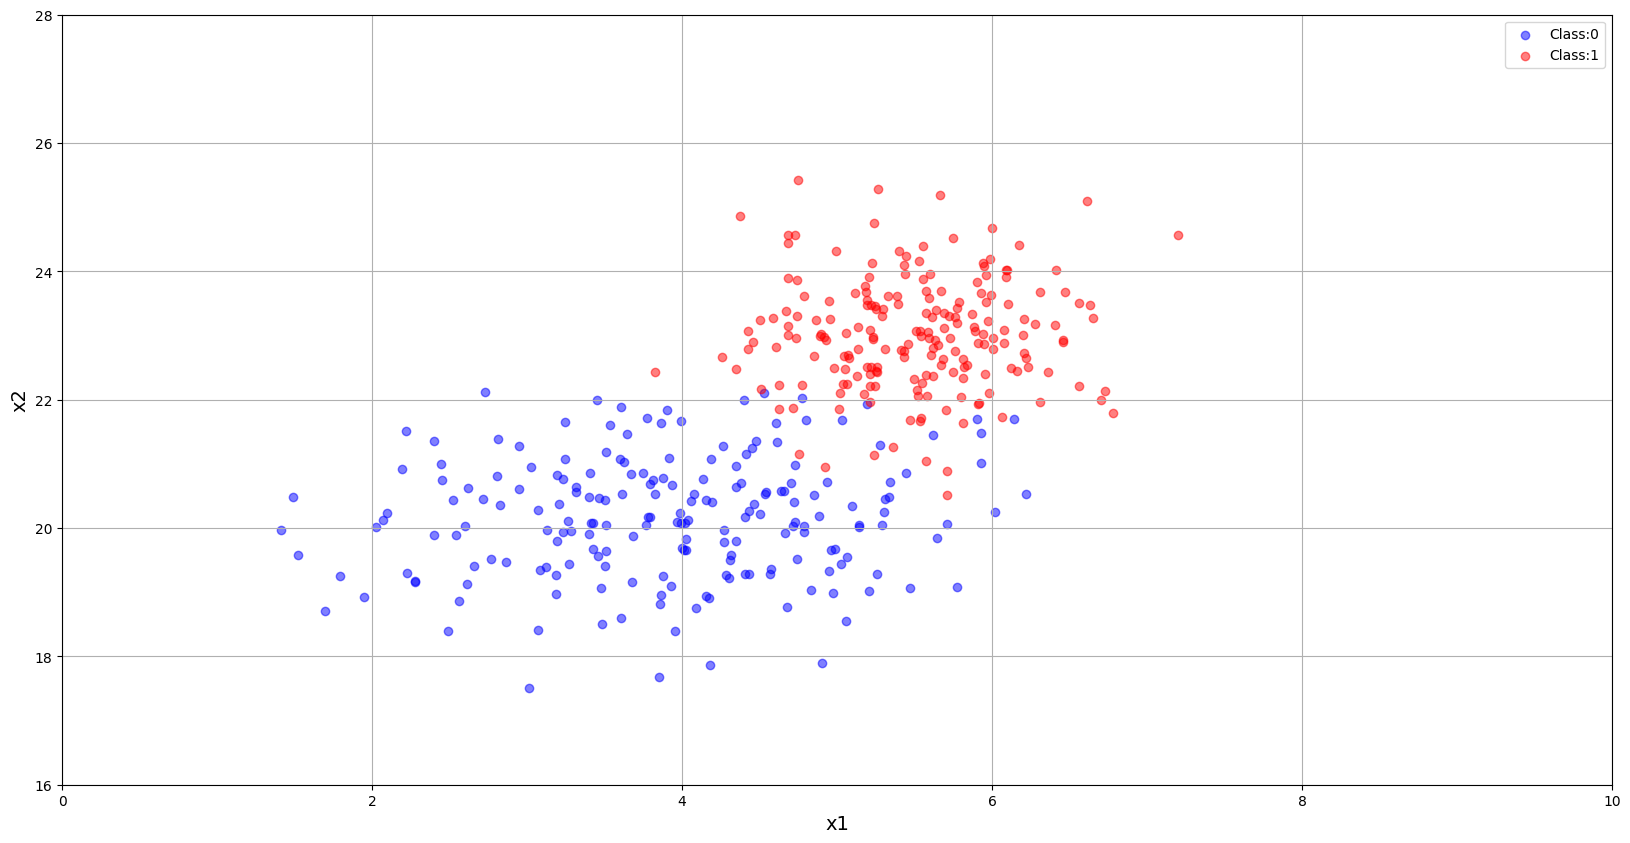

In [ ]:
class_0_points, class_1_points = generate_data()

plt.figure(figsize=(20, 10))
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color="b", alpha=0.5, label="Class:0")
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color="r", alpha=0.5, label="Class:1")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim([0, 10])
plt.ylim([16, 28])
plt.grid(True)

plt.show(block=block_plot)
plt.close()

## 5 Data Preparation

The following function will combine the features and labels from each class into a single data array and label array.

In [ ]:
def prepare_data(class_0_points, class_1_points):

    label_zero = torch.zeros(class_0_points.shape[0], dtype=torch.float)
    label_one  = torch.ones(class_1_points.shape[0], dtype=torch.float)

    labels = torch.cat([label_zero, label_one], dim=0).unsqueeze(dim=1)
    data_points = torch.cat([class_0_points, class_1_points], dim=0)

    print(f"Data points size: {data_points.shape}")
    print(f"Label size: {labels.shape}")
    return data_points, labels

In [ ]:
# Combine class and generate class labels.
X_train, y_train = prepare_data(class_0_points, class_1_points)

Data points size: torch.Size([400, 2])
Label size: torch.Size([400, 1])


## 6 Perform Training


### 6.1 Perform Data Normalization

Before we start with our actual training, we need to normalize our data using its mean and standard deviation.

In [ ]:
def normalize_data(data, mean, std):
    data_norm = (data - mean)/std
    return data_norm

In [ ]:
print(f"Train Data shape: {X_train.shape}")

mean = X_train.mean(0)
std = X_train.std(0)

print(f"Mean:   {mean}")
print(f"Std:    {std}")

X_train = normalize_data(X_train, mean=mean, std=std)

Train Data shape: torch.Size([400, 2])
Mean:   tensor([ 4.7079, 21.5937])
Std:    tensor([1.1404, 1.6858])


### 6.2 Model Architecture Definition

In [ ]:
model = nn.Linear(in_features=2, out_features=1)

print(summary(model, input_size=(1,2)))

Layer (type:depth-idx)                   Output Shape              Param #
Linear                                   [1, 1]                    3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


### 6.3 Train the Model

In [ ]:
def train(model, data_points, labels, epochs, optimizer, batch_size=10):

    num_batches = math.ceil(len(labels)/ batch_size)

    loss_history = []
    acc_history = []

    model = model.to(DEVICE)
    model.train()

    # Trainig time measurement.
    t_begin = time.time()
    for epoch_idx in range(epochs):

        # Clear cell outputs at the start of each epoch.
        clear_output()

        # Shuffle data at the start of each epochs.
        shuffled_indices = torch.randperm(len(labels))
        shuffled_data = data_points[shuffled_indices]
        shuffled_labels = labels[shuffled_indices]

        step_loss = 0
        step_accuracy = 0

        for batch_idx in range(num_batches):

            start_ind = batch_idx*batch_size
            end_ind   = (batch_idx + 1)*batch_size

            batched_data = shuffled_data[start_ind:end_ind].to(DEVICE)
            batched_targets = shuffled_labels[start_ind:end_ind].to(DEVICE)

            # Set the weight gradients to zero for every min-batch to avoid
            # gradient accumulation.
            optimizer.zero_grad()

            # Forward pass through the model.
            logits = model(batched_data)

            # Compute Loss.
            loss = F.binary_cross_entropy_with_logits(logits, batched_targets)

            # Compute gradients using backpropagation.
            loss.backward()

            # Update model weights.
            optimizer.step()

            # Convert the output logits to probabilities.
            predictions = logits.sigmoid()

            # Batch Loss.
            step_loss+= loss.item()* batched_data.shape[0]

            # Batch Acuuracy.
            step_accuracy+= ((predictions > 0.5).int().cpu() == batched_targets.cpu()).sum()

        epoch_loss = float(step_loss / len(labels))
        epoch_acc = float(step_accuracy/ len(labels))

        print(f"{f'{bold}[ Epoch: {epoch_idx+1} ]{reset}':=^80}")

        train_loss_stat = f"{bold}Loss: {epoch_loss:.4f}{reset}"
        train_acc_stat = f"{bold}Accuracy: {epoch_acc:.4f}{reset}"

        print(f"\n{train_loss_stat:<30}{train_acc_stat}")

        print(f"{'='*72}\n")

        loss_history.append(epoch_loss)
        acc_history.append(epoch_acc)


    print(f"Total time taken: {(time.time() - t_begin):.2f}s")
    return model, loss_history, acc_history

In [ ]:
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

trained_model, loss_history, acc_history = train(
                            model=model,
                            data_points=X_train,
                            labels=y_train,
                            epochs=100,
                            optimizer=optimizer_sgd,
                            batch_size=16)

=============================[ Epoch: 100 ]=============================

Loss: 0.1341          Accuracy: 0.9550

Total time taken: 2.46s


## 7 Model Evaluation

### 7.1 Plot Training Loss

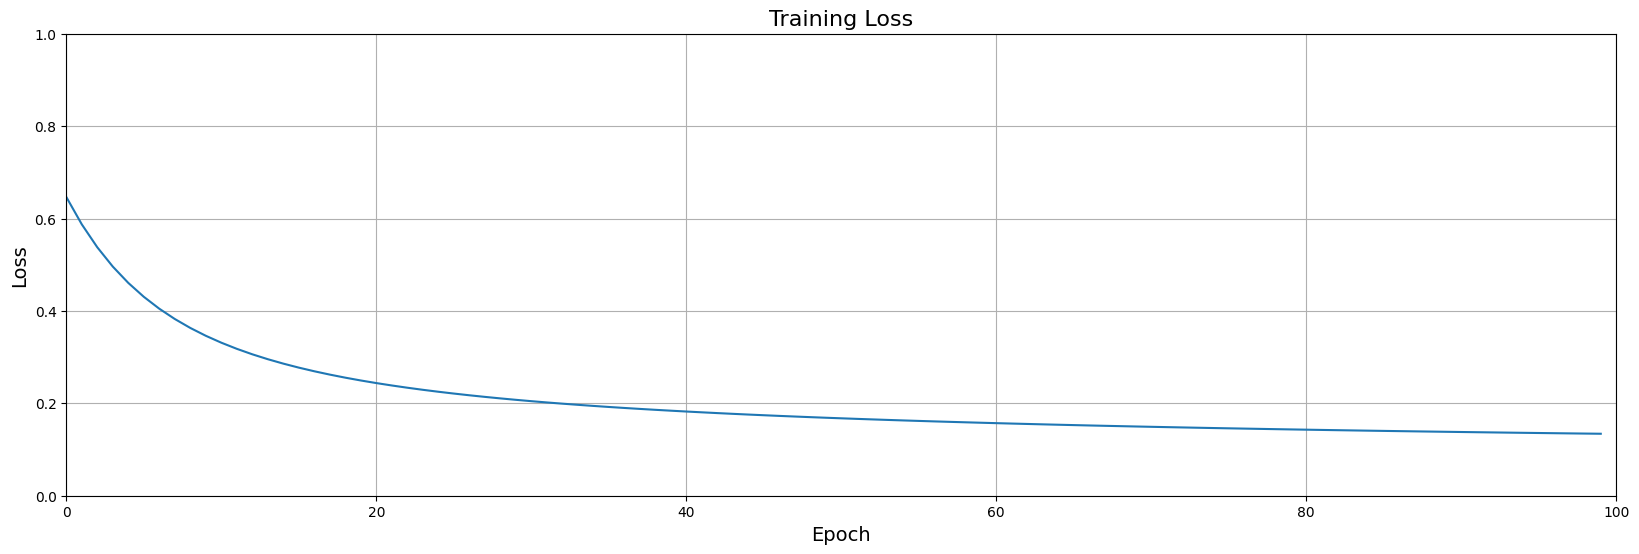

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.xlim([0, 100])
plt.ylim([0, 1])
plt.grid(True)

plt.show(block=block_plot)
plt.close()

### 7.2 Plot Training Accuracy

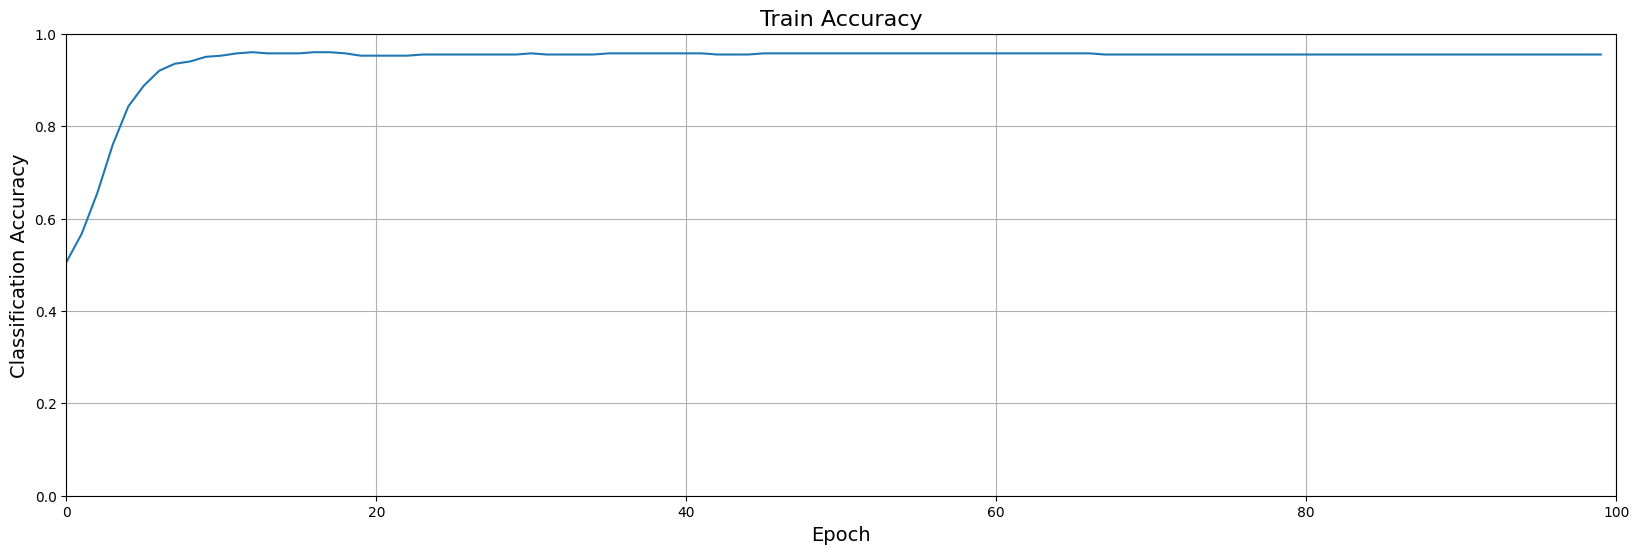

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(acc_history)), acc_history)
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
plt.title("Train Accuracy")
plt.grid(True)
plt.xlim([0, 100]);
plt.ylim([0, 1]);

### 7.3 Model Prediction

In [ ]:
# Define a function that maps the predicted score to the appropriate class name.
def pred_class(pred):

    pred = pred.squeeze().numpy()

    if pred > 0.5:
        class_label = 'Malignant'
    else:
        class_label = 'Benign'

    return class_label

In [ ]:
# Define a function to convert output logits to probability scores.
def predict(model, inputs, device="cpu"):

    model.eval()
    with torch.no_grad():
        logits = model(inputs.to(device)).cpu()

    preds = logits.sigmoid()
    return preds

Let's see how the model performs on a couple of example data points. Feel free to edit the code below and try other values for the features.

In [ ]:
test_data_1 = torch.tensor([ 5.0, 21.0 ]).unsqueeze(0)
test_data_2 = torch.tensor([ 5.0, 22.0 ]).unsqueeze(0)

test_data_1 = normalize_data(test_data_1, mean, std)
test_data_2 = normalize_data(test_data_2, mean, std)

pred_score_1 = predict(trained_model, test_data_1, device=DEVICE)
pred_score_2 = predict(trained_model, test_data_2, device=DEVICE)

class_label_1 = pred_class(pred_score_1)
class_label_2 = pred_class(pred_score_2)

print('Tumor-1: ', class_label_1)
print('Tumor-2: ', class_label_2)

Tumor-1:  Benign
Tumor-2:  Malignant


### 7.4 Model Diagnostics: The Role of the Activation Function

In this section we will create some diagnostics plots to better illustrate how binary classificaton actually works. In order to create these diagnostics

### <font style="color:rgb(50,120,230)">Define two convenience functions</font>

In [ ]:
# Neuron: WX + B
def wx_plus_b(W, X, B):
    return torch.matmul(X, W) + B

# Sigmoid activation.
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

### <font style="color:rgb(50,120,230)">Retrieve weights from the trained model</font>

In [ ]:
# Retrieve weights from the trained model.
weights = trained_model.weight.detach().cpu()
bias = trained_model.bias.detach().cpu()

w1 = weights[0][0]
w2 = weights[0][1]
b  = bias[0]

print('Weights associated with normalized data')
print('b: ',b.numpy())
print('w1: ',w1.numpy())
print('w2: ',w2.numpy())
print('\n')

# Unnormalize the weights for use in diagnostics.
w1 = w1/std[0]
w2 = w2/std[1]
b = b - w1*mean[0] - w2*mean[1]

print('Weights associated with unnormalized data')
print('b: ',b.numpy())
print('w1: ',w1.numpy())
print('w2: ',w2.numpy())

Weights associated with normalized data
b:  -0.17992269
w1:  1.4262156
w2:  2.4768257


Weights associated with unnormalized data
b:  -37.793068
w1:  1.2506005
w2:  1.4691973


### <font style="color:rgb(50,120,230)">Plot the sigmoid activations</font>

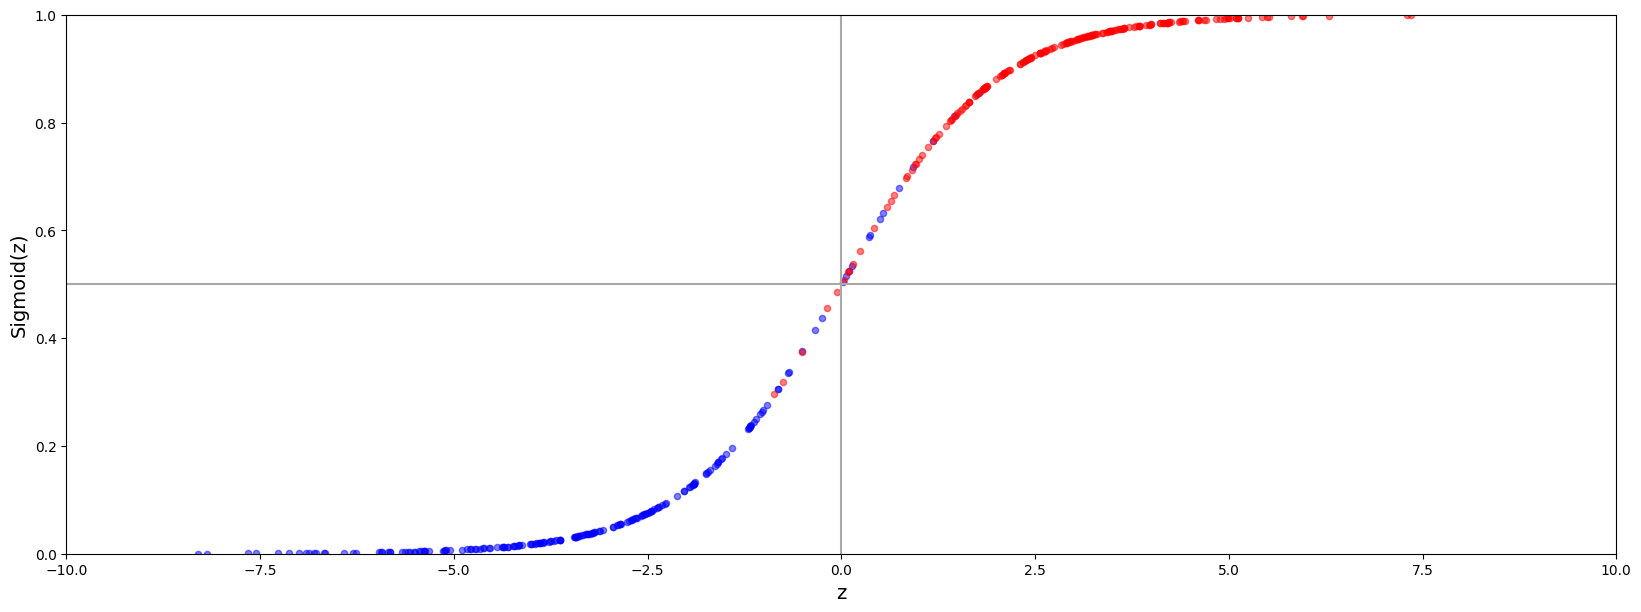

In [ ]:
W = torch.zeros((2, 1))
W[0][0] = w1
W[1][0] = w2

# Compute sigmoid activations for class 0.
z_0 = wx_plus_b(W, class_0_points, b)
y_pred_0 = sigmoid(z_0)

# Compute sigmoid activations for class 1.
z_1 = wx_plus_b(W, class_1_points, b)
y_pred_1 = sigmoid(z_1)

plt.figure(figsize=(20, 7))
plt.scatter(z_0, y_pred_0, s=20, color="b", alpha=0.5, label="Class:0")
plt.scatter(z_1, y_pred_1, s=20, color="r", alpha=0.5, label="Class:0")
plt.plot([0, 0], [0, 1], color="darkgray")
plt.plot([-10, 10], [0.5, 0.5], color="darkgray")
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.grid(False)
plt.xlim([-10, 10])
plt.ylim([0, 1]);

### 7.5 Model Diagnostics: Plot the Decision Boundary

We will plot the decision boundary using the weight and biases obtained from training the network.

In [ ]:
def plot_decision_boundary(b, w1, w2, class_0_points, class_1_points):
    plt.figure(figsize=(20, 8))
    plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color="b", alpha=0.5, label="Class:0")
    plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color="r", alpha=0.5, label="Class:1")

    x1 = torch.linspace(0.0, 10.0, 1000)
    x2 = -(w1/w2)*x1 - b/w2

    plt.plot(x1, x2, c="black", alpha=.5)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim([0, 10])
    plt.ylim([16, 28])
    plt.grid(True)
    plt.legend()
    plt.show(block=block_plot)

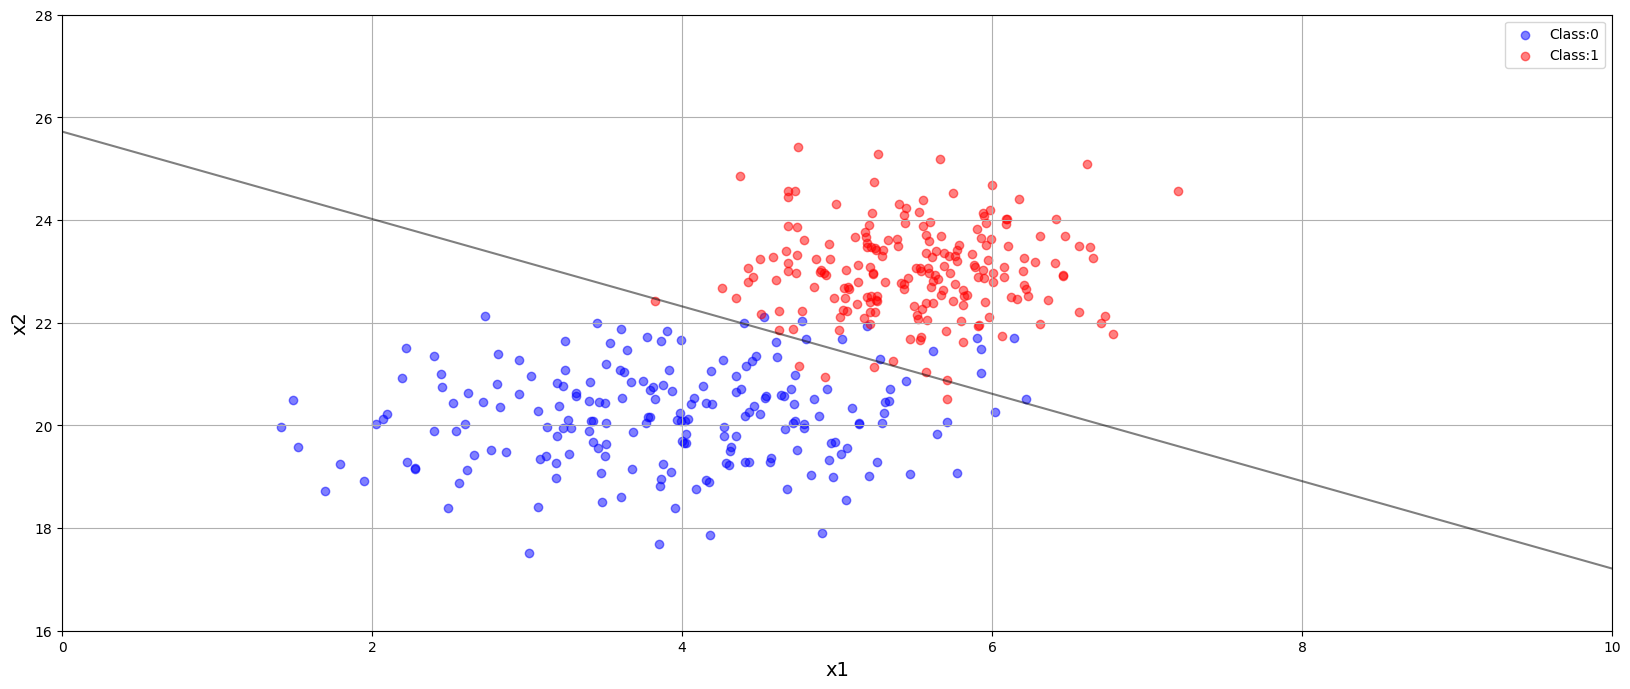

In [ ]:
plot_decision_boundary(b, w1, w2, class_0_points, class_1_points)

### 7.6 Model Diagnostics: Confusion Matrix

A confusion matrix is a very standard was to summaraize the performance of a classification. In a simple visual table it provides the number (or percentage) of the following clqassifications. Class 0 is typically refered to as the negative class and class 1 as the positive class. In many applications these have definite meanings. For example, a malignant tumor would be considered as the positive class. So a false positive would be classifying a benign tumor (0) as malignant (1), which is an error, but not nearly as grave an error as a false negative, classifying a malignant tumor (1) as benign (0).

`- True  Positive (class 1 is classified as class 1)`<br/>
`- False Positive (class 0 is classified as class 1)`<br/>
`- True  Negative (class 0 is classified as class 0)`<br/>
`- False Negative (class 1 is classified as class 0)`<br/>


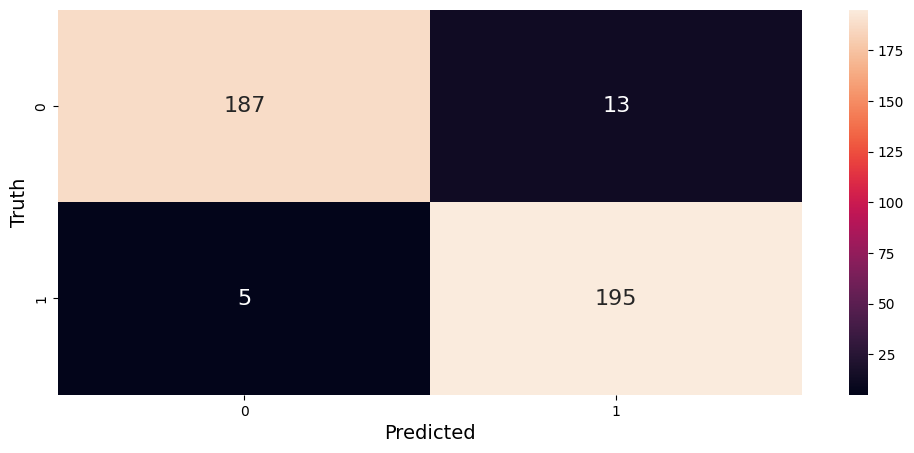

In [ ]:
predictions = predict(trained_model, X_train, device=DEVICE).squeeze()
predicted_labels = torch.where(predictions>0.5, 1, 0)

cm = confusion_matrix(y_train.squeeze().numpy(), predicted_labels.numpy())

plt.figure(figsize=[12, 5])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## 8 Conclusion

In this notebook, we introduced the mathematical foundation for binary classification and showed that the logistic function (or sigmoid) forms the basis for predicting categorical outputs. We showed that the loss function for binary classification is Binary Cross Entropy Loss and that this can be derived from a probabilistic interpretation of the sigmoid function. We also demonstrated how this problem can easily be formulated as a single layer neural network and implemented in Keras. Finally, we demonstrated how the model weights can be helpful in creating various diagnostic plots that provide additional insight.